**1.** 

In [131]:
#Reading in the data and sorting into groups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm


data = pd.read_csv(r"C:\Users\mhlad\OneDrive\Desktop\Georgia Tech\Chava\current.csv")
group1 = data.iloc[:,[1, 2] + list(range(6, 20))] #Output & Income 
group2 = data.iloc[:, list(range(20,48)) + list(range(120,123))] #Labor Market
group3 = data.iloc[:, list(range(48,58))] #Consumption and Orders
group4 = data.iloc[:, list(range(3,6)) + list(range(58,64)) + [123]] # Orders & Inventories
group5 = data.iloc[:, list(range(64,74)) + list(range(124,127))] #Money & Credit
group6 = data.iloc[:, list(range(78,100))] #Interest rate & Exchange rates
group7 = data.iloc[:, list(range(100,121))] #Prices
group8 = data.iloc[:, list(range(74,78))] #Stock Market



,RPI,W875RX1,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS
0,5.000,5.0,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,2.0000
1,2442.158,2293.2,21.9665,23.3891,22.2688,31.7011,19.0149,38.1501,8.0434,20.0387,11.9952,30.6591,20.8382,19.9173,34.6654,80.1973
2,2451.778,2301.5,22.3966,23.7048,22.4617,31.9337,19.1147,38.5147,8.1510,20.6733,12.5477,31.1959,21.2213,19.8631,34.1932,81.4428
3,2467.594,2318.5,22.7193,23.8483,22.5719,31.9337,19.4890,38.3324,8.2391,21.2103,13.0420,31.6645,21.5533,19.9986,35.0589,82.4769
4,2483.671,2334.9,23.2032,24.1927,22.9026,32.4374,19.6138,38.9705,8.4544,21.7961,13.4346,32.6452,22.0130,20.0799,34.9015,83.9922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,17885.887,14664.3,102.6630,101.0357,101.1926,102.4396,104.3541,101.8431,95.3280,104.5810,96.2055,97.7382,99.1191,109.8907,88.0265,77.8356
772,17870.818,14669.5,103.2804,101.9250,102.5050,103.8769,108.9413,102.4509,96.4418,104.8670,98.0990,97.1957,100.0882,109.4305,88.3013,78.5117
773,17930.452,14721.6,102.8040,101.5949,102.1262,103.3999,109.3608,101.7382,96.0261,104.2108,98.1113,96.4102,99.9348,105.6341,89.8476,78.3061
774,17956.189,14754.4,102.2468,100.8892,101.2125,102.0809,106.3763,100.8596,95.9920,103.8395,98.3574,96.3222,99.6136,102.2940,89.4411,77.9688


There are missing variables in our dataset, these are as follows:
*   Group 1. NAPMPI
*   Group 2. NAPMEI
*   Group 4. NAPM, NAPMNOI, NAPMSDI, NAPMII
*   Group 5. MZMSL, AMBSL replaced with BOGMBASE
*   Group 6. TWEXMMTH replaced with TWEXAFEGSMTHx
*   Group 7.   NAPMPRI, (PPIFGIS, PPIFCG, PPIITM, PPICRM are replaced with WPSFD49207	WPSFD49502	WPSID61	WPSID62)

In [104]:
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
#Descriptive stats 
def descriptive_stats(group):
    for i in group:
        print("Variable: ", i)        
        names = ["mean", 'std', 'min', '25%', '50%', '75%', 'max']
        values = [group[i].mean(), group[i].std(), group[i].min(), group[i].quantile(q=0.25), group[i].quantile(q=0.50), group[i].quantile(q=0.75), group[i].max()]
        table = [names, values]
        print(tabulate(table))
        print("\n")
    sns.heatmap(group.corr())

Variable:  RPI
-----------------  -----------------  ---  -----------------  --------  ---------  ---------
mean               std                min  25%                50%       75%        max
8832.440348387096  4629.722513047397  5.0  4818.120999999999  7789.786  12837.643  21448.063
-----------------  -----------------  ---  -----------------  --------  ---------  ---------


Variable:  W875RX1
-----------------  ------------------  ---  ------  ------  --------  -------
mean               std                 min  25%     50%     75%       max
7544.798322580646  3685.0601556921065  5.0  4286.9  6800.3  10748.25  14754.4
-----------------  ------------------  ---  ------  ------  --------  -------


Variable:  INDPRO
-----------------  ------------------  ---  --------  -------  --------  --------
mean               std                 min  25%       50%      75%       max
66.79248980645161  26.688837839214607  5.0  44.58135  62.1789  93.64265  104.1181
-----------------  ----------

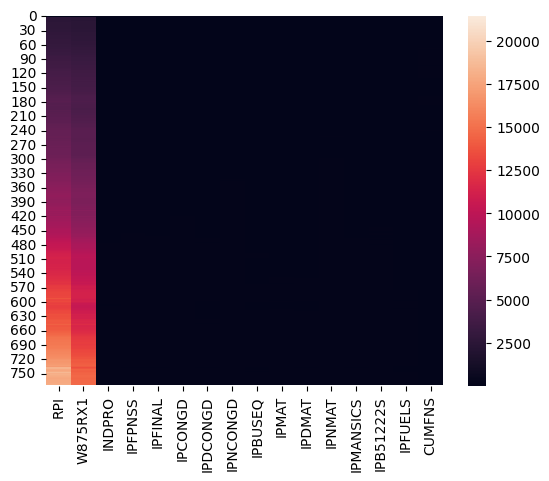

In [103]:
#Group1
descriptive_stats(group1)

* CUMFNS has a negative correlation with the rest of the variables in the group.
* If people are buying everything in "a factory," the factory does not need to utilize it's capacity. Therefore, in periods of high cosnumer spending (high personal income), capacity utilization would be decreased. 

Variable:  HWI
------------------  -----------------  ---  ------  ------  -------  -------
mean                std                min  25%     50%     75%      max
4093.4651162790697  1780.157215958548  2.0  3041.0  3878.0  4726.25  12027.0
------------------  -----------------  ---  ------  ------  -------  -------


Variable:  HWIURATIO
------------------  -------------------  -----------  -------------  -----------  -------------  -----------
mean                std                  min          25%            50%          75%            max
0.6401923405452196  0.33418682842216585  0.152866242  0.41076256725  0.555033141  0.77777563825  2.013898192
------------------  -------------------  -----------  -------------  -----------  -------------  -----------


Variable:  CLF16OV
------------------  ------------------  ---  -------  --------  --------  --------
mean                std                 min  25%      50%       75%       max
121477.00774193548  31449.170709211037  5.0  929

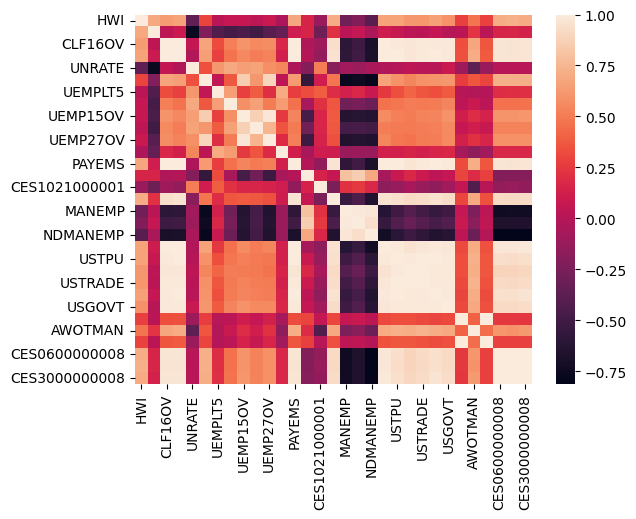

In [109]:
#Group2 
descriptive_stats(group2)

* The Manufacturing employees variables are negatively correlated with the rest of the group. 
* This makes sense, as unemployment is low, manufacturing employees should increase, thus an inverse relationship exists. 

Variable:  HOUST
------------------  ------------------  ---  ------  ------  ------  ------
mean                std                 min  25%     50%     75%     max
1431.5277419354838  387.08753684443917  4.0  1197.0  1459.0  1652.5  2494.0
------------------  ------------------  ---  ------  ------  ------  ------


Variable:  HOUSTNE
------------------  -----------------  ---  -----  -----  -----  -----
mean                std                min  25%    50%    75%    max
170.97806451612902  67.87089342673806  4.0  123.0  157.0  219.5  395.0
------------------  -----------------  ---  -----  -----  -----  -----


Variable:  HOUSTMW
------------------  -----------------  ---  -----  -----  -----  -----
mean                std                min  25%    50%    75%    max
275.91483870967744  99.30359824542843  4.0  203.0  283.0  345.5  590.0
------------------  -----------------  ---  -----  -----  -----  -----


Variable:  HOUSTS
-----------------  ------------------  ---  -----  -----

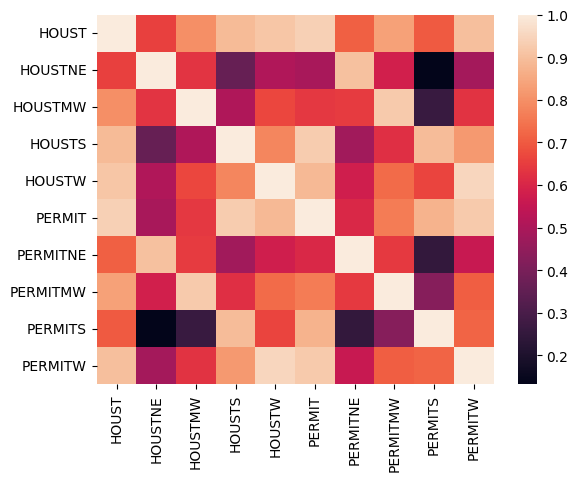

In [107]:
group3
descriptive_stats(group3)

* Housing starts in the north east has no correlation with new housing permtis in the south, which makes sense. 
* We see high correlation with housing new builds and new housing permits. This is becuase you would need a permit to build a house, so there should be a huge correlation as these variables are not independent of each other. 

Variable:  DPCERA3M086SBEA
-----------------  -----------------  ---  ------------------  ------  -----------------  -------
mean               std                min  25%                 50%     75%                max
62.55803612903225  33.27629948929922  5.0  32.486000000000004  54.668  95.08699999999999  130.878
-----------------  -----------------  ---  ------------------  ------  -----------------  -------


Variable:  CMRMTSPLx
-----------------  ------------------  ---  -----------  -----------  ----------  ---------
mean               std                 min  25%          50%          75%         max
853561.2710114989  398338.92700147815  5.0  512414.5955  754807.3485  1222318.25  1585920.0
-----------------  ------------------  ---  -----------  -----------  ----------  ---------


Variable:  RETAILx
------------------  ------------------  ---  ------------------  -----------  --------  --------
mean                std                 min  25%                 50%          75% 

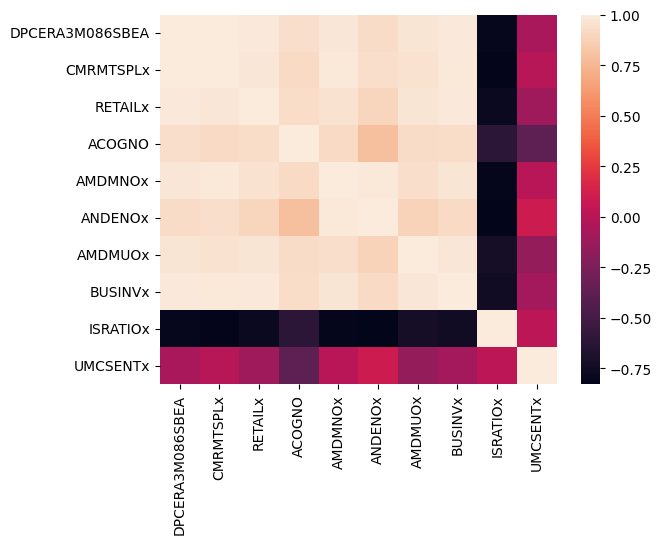

In [108]:
descriptive_stats(group4)

* Consumer Sentiment index appears to have a slight negative correlation with the rest of the indicatrors.
* Consumers are just spending less and saving more, so their consumpution is lower. 
* Inventories to sale ratio is negatively correlated with the other indicators, this is possibly due to that when sales are low, the ratio tends to be higher. There is an inverse relationship. 

Variable:  M1SL
------------------  ------------------  ---  -----  -----  ------  -------
mean                std                 min  25%    50%    75%     max
1933.2847741935484  4036.3743922605295  6.0  274.6  838.7  1378.2  20664.2
------------------  ------------------  ---  -----  -----  ------  -------


Variable:  M2SL
------------------  -----------------  ---  -----  ------  -------  -------
mean                std                min  25%    50%     75%      max
5059.4437419354845  5316.834775759203  6.0  910.2  3321.9  7238.35  21703.6
------------------  -----------------  ---  -----  ------  -------  -------


Variable:  M2REAL
-----------------  ------------------  ---  ------  ------  -------  ------
mean               std                 min  25%     50%     75%      max
2892.350580645161  1584.0132245997906  5.0  1841.3  2416.2  3508.15  7671.8
-----------------  ------------------  ---  ------  ------  -------  ------


Variable:  BOGMBASE
------------------  -------

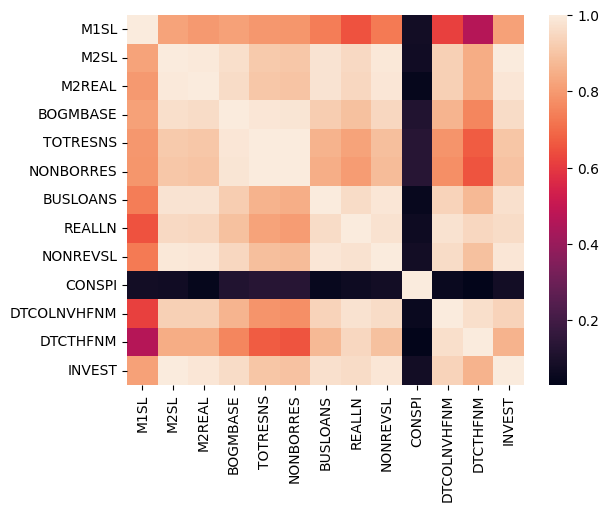

In [110]:
descriptive_stats(group5)

* Nonrevolving consumer credit to personal income has no correlation with the variables in the group. This may be because the variables are based on different economic indicators. 
* M1SL and M2SL are related to central banks and money supply, but CONSPI is related to consumer behavior.

Variable:  FEDFUNDS
-----------------  ------------------  ----  ----  ----  -----  ----
mean               std                 min   25%   50%   75%    max
4.763458064516129  3.6610321281565095  0.05  1.92  4.63  6.535  19.1
-----------------  ------------------  ----  ----  ----  -----  ----


Variable:  CP3Mx
-----------------  ------------------  ----  ------  -----------------  ------  -----
mean               std                 min   25%     50%                75%     max
4.892480620155038  3.4503795912458717  0.09  2.3175  4.859999999999999  6.5875  18.07
-----------------  ------------------  ----  ------  -----------------  ------  -----


Variable:  TB3MS
-----------------  ------------------  ----  ------------------  ----  ----  ----
mean               std                 min   25%                 50%   75%   max
4.343458064516129  3.1568832821863513  0.01  1.9249999999999998  4.43  5.96  16.3
-----------------  ------------------  ----  ------------------  ----  ----  ---

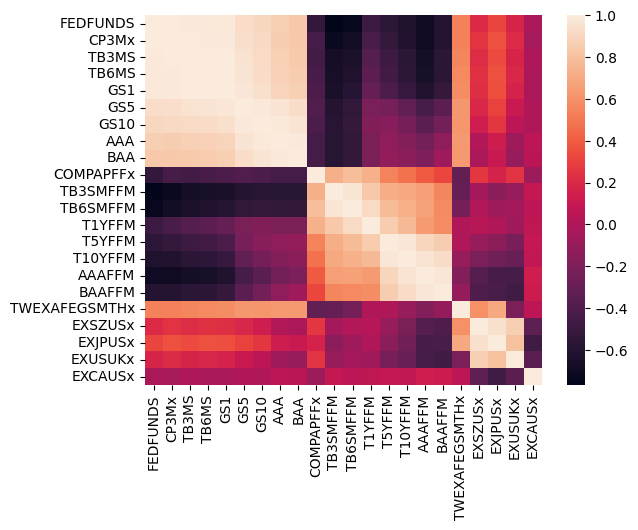

In [111]:
descriptive_stats(group6)

* We see a negative correlation with the bonds minus the FEDFUNDS and the other variables
* This tells us that there is an inverse relationship to the rates and bills with those bonds without the FEDFUNDS. 

Variable:  WPSFD49207
-----------------  -----------------  ---  ----  -----  ------  -------
mean               std                min  25%   50%    75%     max
116.5036193548387  61.40008763692949  6.0  56.6  121.5  165.65  258.377
-----------------  -----------------  ---  ----  -----  ------  -------


Variable:  WPSFD49502
------------------  -----------------  ---  ------------------  -----  -----  ------
mean                std                min  25%                 50%    75%    max
119.42240516129033  65.95815963943869  6.0  56.650000000000006  120.2  172.2  282.39
------------------  -----------------  ---  ------------------  -----  -----  ------


Variable:  WPSID61
------------------  ------------------  ---  -----  -----  -----  -------
mean                std                 min  25%    50%    75%    max
114.24366580645159  62.848703154127314  6.0  57.45  114.0  168.3  279.925
------------------  ------------------  ---  -----  -----  -----  -------


Variable:  WPSID62

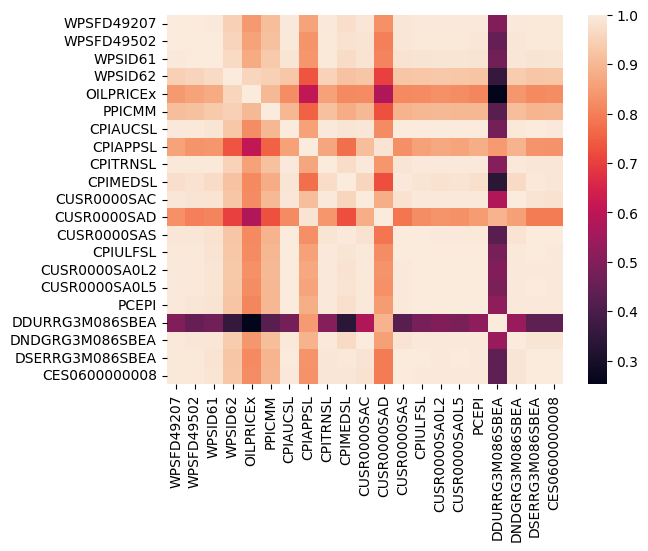

In [112]:
descriptive_stats(group7)

* There is no correlation of Personal Consumer Expenditures of Durable good with other variables. 
* This means that consumers are spending less on durable goods, which is indicative that consumers are saving more in the current economic state. 

Variable:  S&P 500
-----------------  ------------------  ---  -----  ------  ------------------  -------
mean               std                 min  25%    50%     75%                 max
858.9242064516128  1032.3766821302745  5.0  100.4  372.28  1282.1399999999999  4674.77
-----------------  ------------------  ---  -----  ------  ------------------  -------


Variable:  S&P: indust
------------------  -----------------  ---  -----  ------  --------  -------
mean                std                min  25%    50%     75%       max
1102.1684387096773  1422.233564975405  5.0  110.6  441.87  1565.745  6561.93
------------------  -----------------  ---  -----  ------  --------  -------


Variable:  S&P div yield
-----------------  ------------------  -----------  -------------  ----------  -------------  -----------
mean               std                 min          25%            50%         75%            max
2.865151067068653  1.1277448512905222  1.108074267  1.91525420075  2.90162386

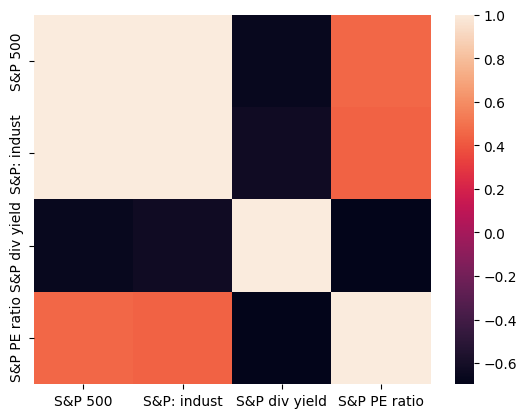

In [113]:
descriptive_stats(group8)

* S&P dividend yield is inversely related to the other S&P indicators. S&P ratio is less correlated than the other indicators. 
* This is because, when earnings growth expectations are low, investors may seek higher dividend yields as a way to generate income, resulting in a lower P/E ratio.

**2.**

Group 5 subgroups: 
1. Money Supply and Monetary Policy:
* M1SL (M1 Money Stock)
* M2SL (M2 Money Stock)
* M2REAL (Real M2 Money Stock)
* AMBSL (St. Louis Adjusted Monetary Base) (Subsituted with BOGMBASE)
* TOTRESNS (Total Reserves of Depository Institutions)
* NONBORRES (Reserves Of Depository Institutions)

2. Bank Loans and Credit:
* BUSLOANS (Commercial and Industrial Loans)
* REALLN (Real Estate Loans at All Commercial Banks)
* NONREVSL (Total Nonrevolving Credit)
* CONSPI (Nonrevolving consumer credit to Personal Income)
* DTCOLNVHFNM (Consumer Motor Vehicle Loans Outstanding)
* DTCTHFNM (Total Consumer Loans and Leases Outstanding)
* INVEST (Securities in Bank Credit at All Commercial Banks)

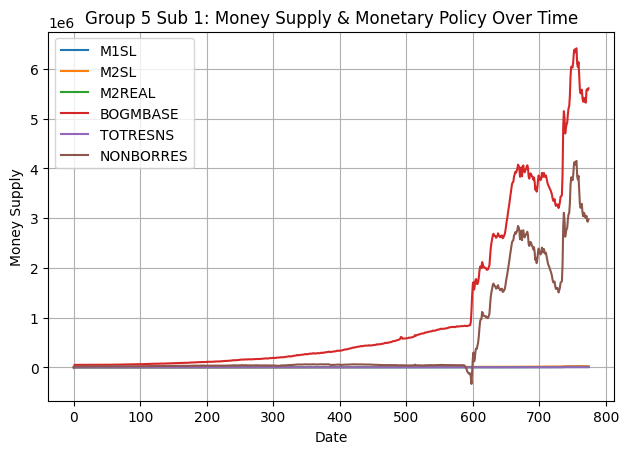

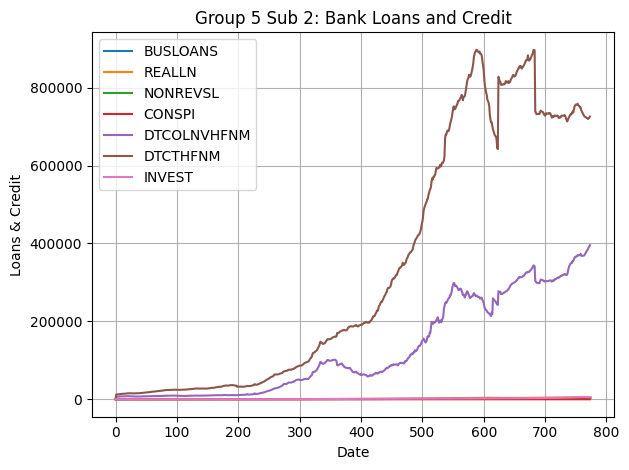

In [52]:
group5sub1 = group5.iloc[:, list(range(0,6))]
group5sub2 = group5.iloc[:, list(range(6, 13))]

#Plotting 
for column in group5sub1.columns:
    plt.plot(group5sub1.index, group5sub1[column], label=column)

# Customize the plot
plt.title('Group 5 Sub 1: Money Supply & Monetary Policy Over Time')
plt.xlabel('Date')
plt.ylabel('Money Supply')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#Plotting 
for column in group5sub2.columns:
    plt.plot(group5sub2.index, group5sub2[column], label=column)

# Customize the plot
plt.title('Group 5 Sub 2: Bank Loans and Credit')
plt.xlabel('Date')
plt.ylabel('Loans & Credit')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


* We see that the BOGMBASE and NONBORRES increase over time while the other indicators stay the same. This just means that the reserves of and the monetary base have increased recently. 
* We also see and increase in outstanding loans over time. This aligns with reality as consumers have taken on more loans at lower interest rates in the past ten years. 

Group 6 subgroups: 
1. Interest Rate
* FEDFUNDS (Effective Federal Funds Rate)
* CP3Mx (3-Month AA Financial Commercial Paper Rate)
* TB3MS (3-Month Treasury Bill Rate)
* TB6MS (6-Month Treasury Bill Rate)
* GS1 (1-Year Treasury Rate)
* GS5 (5-Year Treasury Rate)
* GS10 (10-Year Treasury Rate)
* AAA (Moody’s Seasoned Aaa Corporate Bond Yield)
* BAA (Moody’s Seasoned Baa Corporate Bond Yield)

2. Spreads Relative to FEDFUNDS:
* COMPAPFFx (3-Month Commercial Paper Minus FEDFUNDS)
* TB3SMFFM (3-Month Treasury C Minus FEDFUNDS)
* TB6SMFFM (6-Month Treasury C Minus FEDFUNDS)
* T1YFFM (1-Year Treasury C Minus FEDFUNDS)
* T5YFFM (5-Year Treasury C Minus FEDFUNDS)
* T10YFFM (10-Year Treasury C Minus FEDFUNDS)
* AAAFFM (Moody’s Aaa Corporate Bond Minus FEDFUNDS)
* BAAFFM (Moody’s Baa Corporate Bond Minus FEDFUNDS)

3. Foreign Exchange Rates:
* TWEXMMTH (Trade Weighted U.S. Dollar Index: Major Currencies)
* EXSZUSx (Switzerland / U.S. Foreign Exchange Rate)
* EXJPUSx (Japan / U.S. Foreign Exchange Rate)
* EXUSUKx (U.S. / U.K. Foreign Exchange Rate)
* EXCAUSx (Canada / U.S. Foreign Exchange Rate)

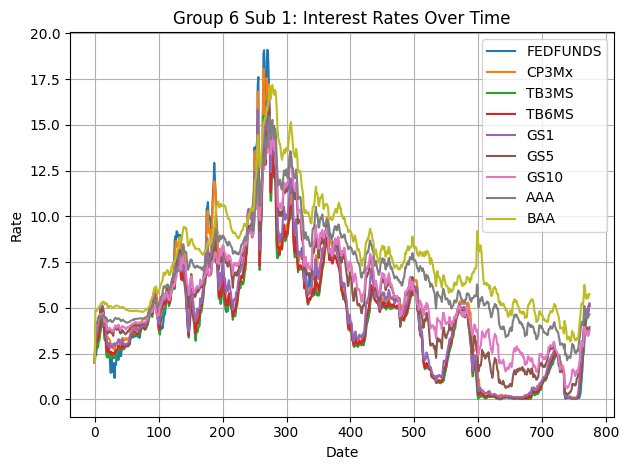

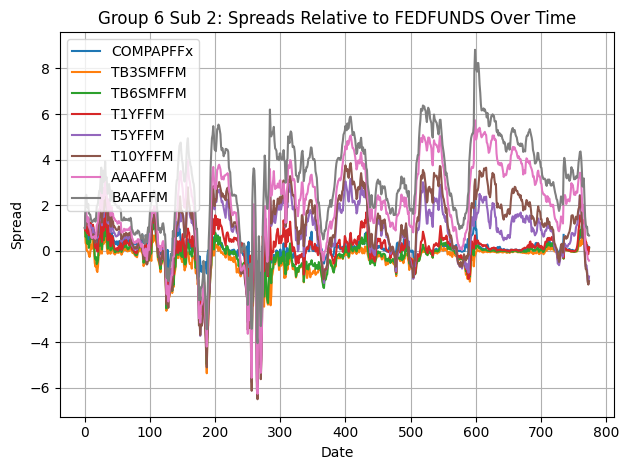

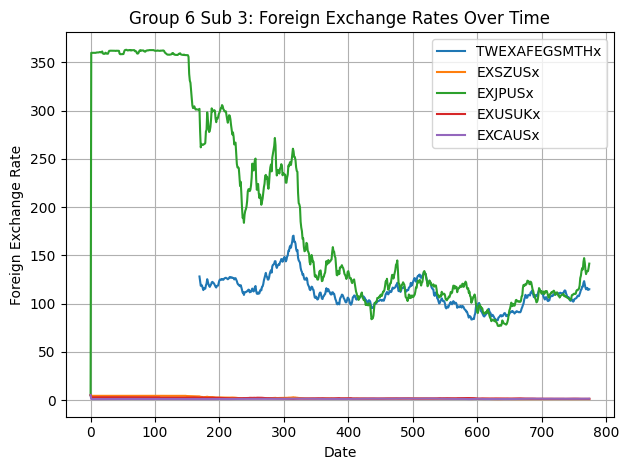

In [50]:
#Code for subgrouping group 6
group6.head()
group6sub1 = group6.iloc[:, list(range(0,9))]
group6sub2 = group6.iloc[:, list(range(9,17))]
group6sub3 = group6.iloc[:, list(range(17,22))]

#Plotting 
for column in group6sub1.columns:
    plt.plot(group6sub1.index, group6sub1[column], label=column)

# Customize the plot
plt.title('Group 6 Sub 1: Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

for column in group6sub2.columns:
    plt.plot(group6sub2.index, group6sub2[column], label=column)

# Customize the plot
plt.title('Group 6 Sub 2: Spreads Relative to FEDFUNDS Over Time')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

for column in group6sub3.columns:
    plt.plot(group6sub3.index, group6sub3[column], label=column)

# Customize the plot
plt.title('Group 6 Sub 3: Foreign Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Foreign Exchange Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


* In subgroup 1, the rates increased and then dropped back down, but are starting to increase again. 
* On these graphs, date 300 referes to the 1980s and date 600 refers to 2008, these are times of economic crashes, so there are less reserves at the federal level. So subtracting the fedfunds from the price of BAA leads to a small difference, hence the high value. 

Group 8 Subgroups: 
1. S&P 500 Correlations: 
* S&P 500 (S&P’s Common Stock Price Index: Composite)
* S&P: indust (S&P’s Common Stock Price Index: Industrials)
2. S&P 500 Dividend and Earnings Ratios:
* S&P div yield (S&P’s Composite Common Stock: Dividend Yield)
* S&P PE ratio (S&P’s Composite Common Stock: Price-Earnings Ratio)


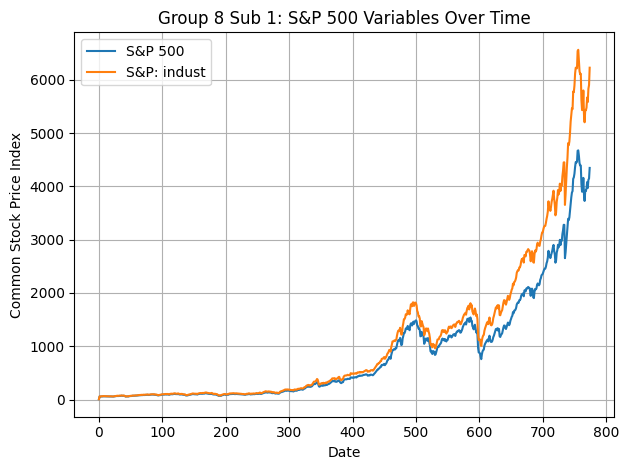

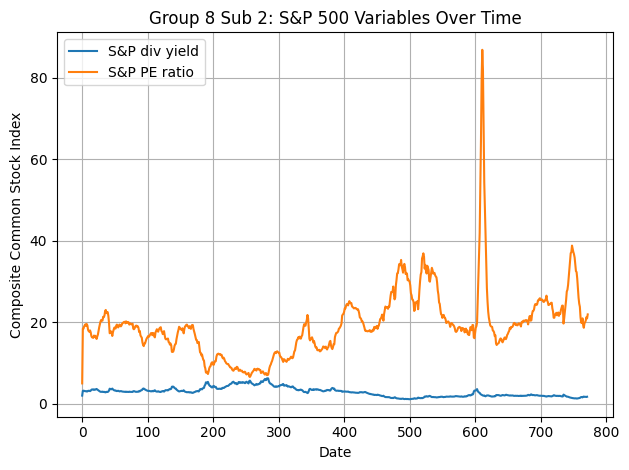

In [47]:
group8.head()
group8sub1 = group8.iloc[:, [0,1]]
group8sub2 = group8.iloc[:, [2,3]]

#Plotting

for column in group8sub1.columns:
    plt.plot(group8sub1.index, group8sub1[column], label=column)

# Customize the plot
plt.title('Group 8 Sub 1: S&P 500 Variables Over Time')
plt.xlabel('Date')
plt.ylabel('Common Stock Price Index')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

for column in group8sub2.columns:
    plt.plot(group8sub2.index, group8sub2[column], label=column)

# Customize the plot
plt.title('Group 8 Sub 2: S&P 500 Variables Over Time')
plt.xlabel('Date')
plt.ylabel('Composite Common Stock Index')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


* For subgroup1, the increase in these indicators since the 2008 crash (date 600) are due to the economic recovery achieved by the federal's monetary policy of low interest rates. We can see a drop around the time of the covid 19 pandemic, but the S&P 500 indicator continues to grow. 
* For subgroup2, the spike in the PE Ratio at date 600 (year 2008), can be attributed to the the denominator in the P/E ratio (earnings per share) decreasing as company earnings plummeted in the financial sector. This denominator decreased more quickly than stock prices did, hence the spike in the PE ratio. This spike reflected the market's pessimism about future earnings prospects and the economic outlook during that period. 

**3.** 

In [114]:
def autoCorrPlot(variable, group, lag):
    variable_to_analyze = variable
    plt.figure(figsize=(12, 6))
    plot_acf(group[variable_to_analyze].dropna(), lags=lag)  
    plt.title(f'ACF for {variable_to_analyze}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

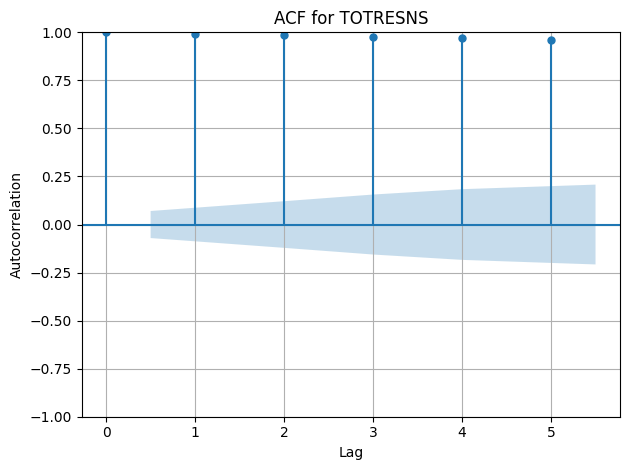

TypeError: autoCorrPlot() missing 1 required positional argument: 'lag'

In [115]:
#Group 5 Sub 1
#TOTRESNS (Total Reserves of Depository Institutions)
autoCorrPlot('TOTRESNS', group5sub1, 5)

* At lag 5 we begin to see a difference in the percent the data is affected by the time lag. Here a lag five is a lag of five months.
* So after about 4 or 5 months, there is a growing difference in the total reserves now than the total reserves initially. 

<Figure size 1200x600 with 0 Axes>

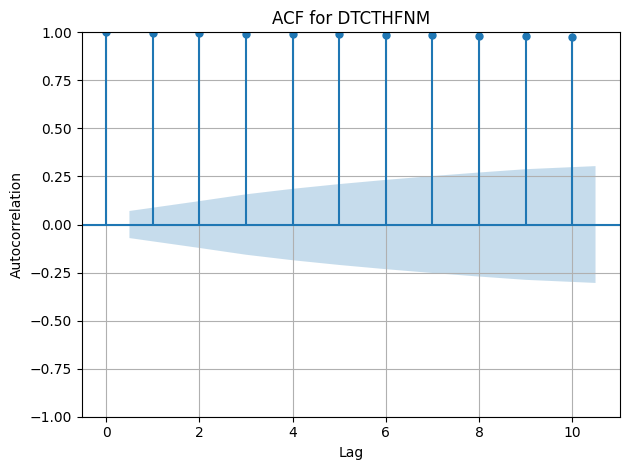

In [118]:

#Group 5 Sub 2
#DTCTHFNM (Total Consumer Loans and Leases Outstanding)
autoCorrPlot('DTCTHFNM', group5sub2, 10)


* Here we see a dissimilarity after 10 months. 
* Total Consumer Loans and Leases Outstanding differences are noted after nearly a year. 

<Figure size 1200x600 with 0 Axes>

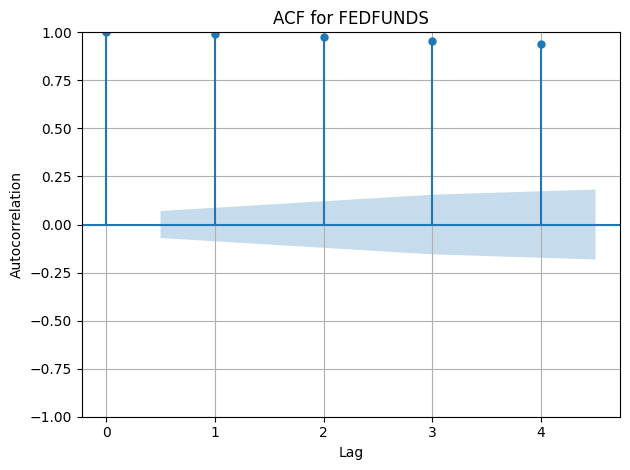

In [120]:
#Group 6 Sub 1
#FEDFUNDS (Effective Federal Funds Rate)
autoCorrPlot('FEDFUNDS', group6sub1, 4)


* There is dissimilarity noted after 3 months. 
* Effective Federal Funds Rate has a lag of about 3 months before the differences are noted. The impact of the fed rate is only realized a few months later.

<Figure size 1200x600 with 0 Axes>

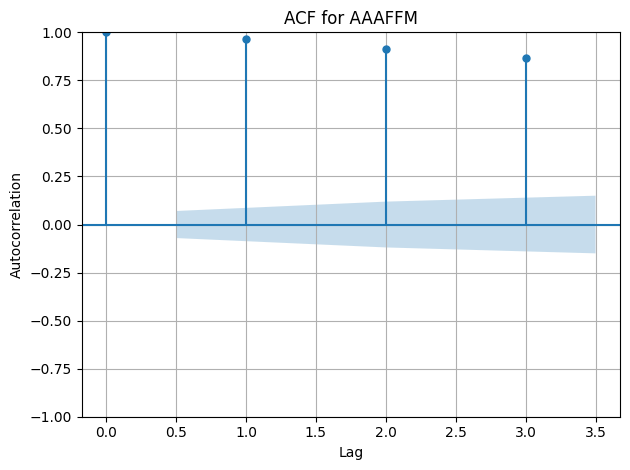

In [130]:

#Group 6 Sub 2
#AAAFFM (Moody’s Aaa Corporate Bond Minus FEDFUNDS)
autoCorrPlot('AAAFFM', group6sub2, 3)

* Here we see a difference that starts at a lag of one month, but its bigger after two months. 
* This lag is very short becuase AAA are short term and react quickly to the Fed Funds rate. 

<Figure size 1200x600 with 0 Axes>

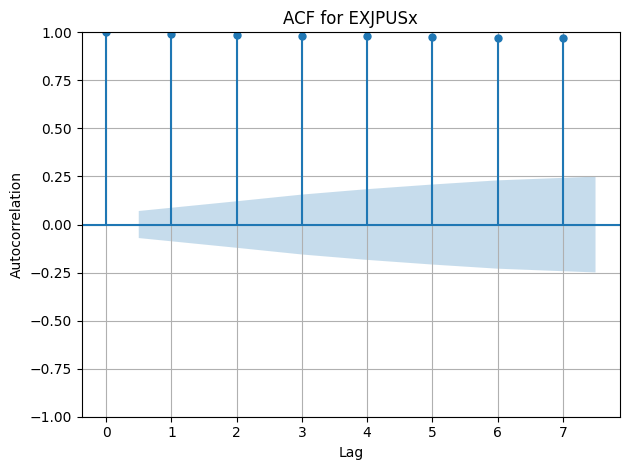

In [123]:
#Group 6 Sub 3
#EXJPUSx (Japan / U.S. Foreign Exchange Rate)
autoCorrPlot('EXJPUSx', group6sub3, 7)

* Here we see a difference noted at a lag of 6 months. 
* The Japan / U.S. Foreign Exchange Rate takes about 6 months to have a notable difference. 

<Figure size 1200x600 with 0 Axes>

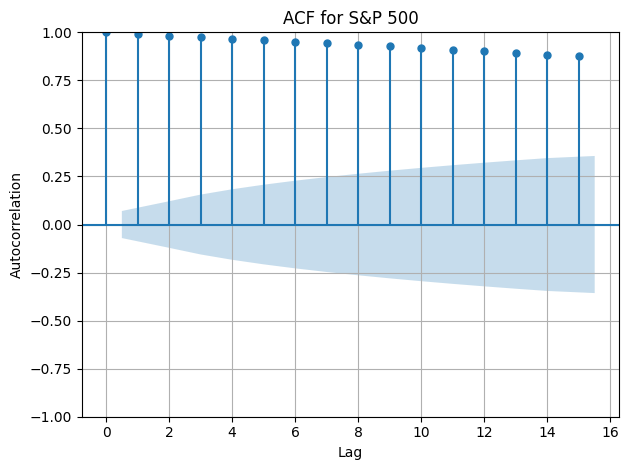

In [125]:

#Group 8 Sub 1
#S&P 500 (S&P’s Common Stock Price Index: Composite)
autoCorrPlot('S&P 500', group8sub1, 15)

* Here there a difference after about 5 months. We see a more noticable difference at 8 months. 
* This can be interpreted that the S&P indicator doesn't change much over time and is only noted after 5 months, and even then, not by much.  

<Figure size 1200x600 with 0 Axes>

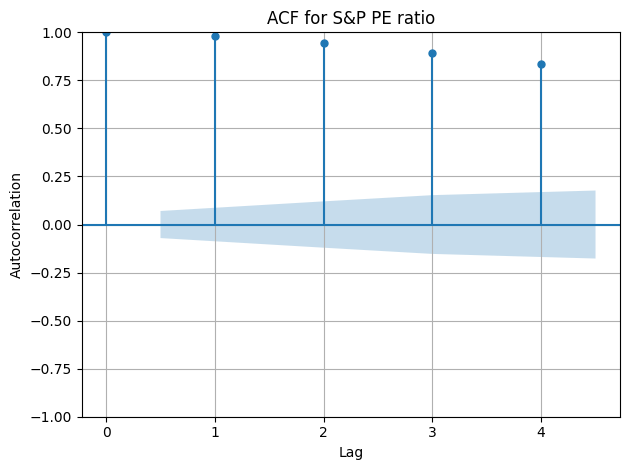

In [127]:
#Group 8 Sub 2
#S&P PE ratio (S&P’s Composite Common Stock: Price-Earnings Ratio)
autoCorrPlot('S&P PE ratio', group8sub2, 4)

* The price earnings ratio has a three month lag. 
* This makes sense as it takes time to consumers and company earnings to be affected by the ecomony and its outlook. 

**4.**

<Axes: >

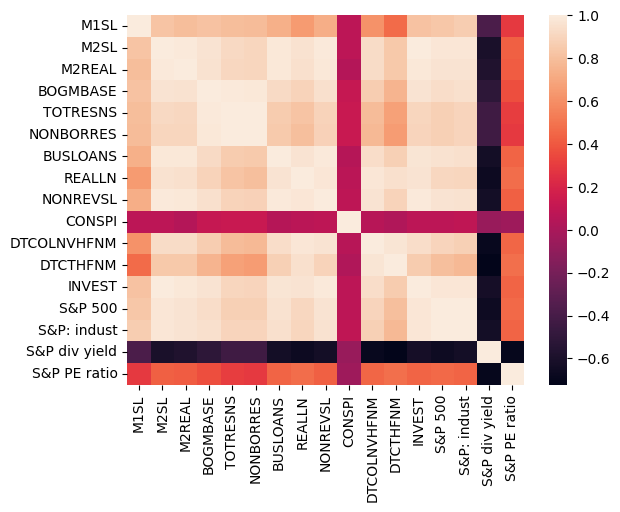

In [87]:
import seaborn as sns
group5and8 = data.iloc[:, list(range(64,74)) + list(range(124,127)) + list(range(74,78))]
sns.heatmap(group5and8.corr())

* This heatmap is not anymore useful than the heatmaps previously. We can still draw the same conclusions, S&P yield is inversly related to other market indicators, while Consumer Credit is not really correlated to the others. 

Which variables would you correlate as contemporaneous and which variables would you LAG so that you can generate more economically interesting insights? Show the correlation heatmap with this lead/lag and comment on any interesting economic insights
* LAG: The loans: DTCOLNVHFNM Consumer Motor Vehicle Loans Outstanding, DTCTHFNM Total Consumer Loans and Leases Outstanding
* Rest are contemporaneous

C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\3538266412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged['DTCOL_lag_3'] = lagged['DTCOLNVHFNM'].shift(3)
C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\3538266412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged['DTCOL_lag_6'] = lagged['DTCOLNVHFNM'].shift(6)
C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\3538266412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

<Axes: >

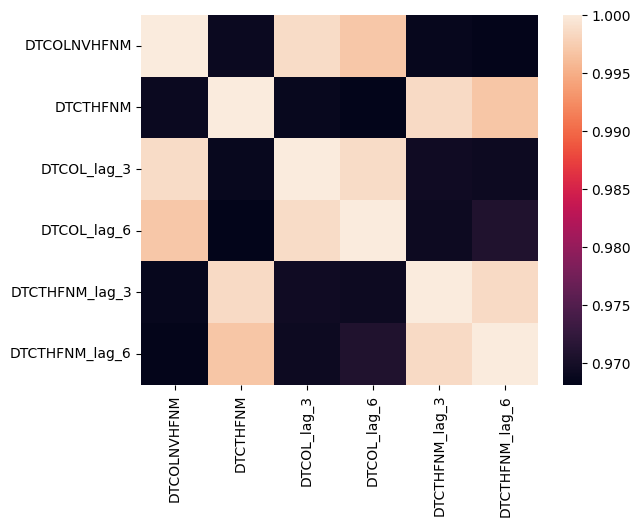

In [145]:
lagged = data.iloc[:, list(range(124,126))]
lagged['DTCOL_lag_3'] = lagged['DTCOLNVHFNM'].shift(3)
lagged['DTCOL_lag_6'] = lagged['DTCOLNVHFNM'].shift(6)
lagged['DTCTHFNM_lag_3'] = lagged['DTCTHFNM'].shift(3)
lagged['DTCTHFNM_lag_6'] = lagged['DTCTHFNM'].shift(6)
sns.heatmap(lagged.corr())


We can see that everything is correlated, which makes sense because these variables are built off of the previous. 

**5.**

<Axes: >

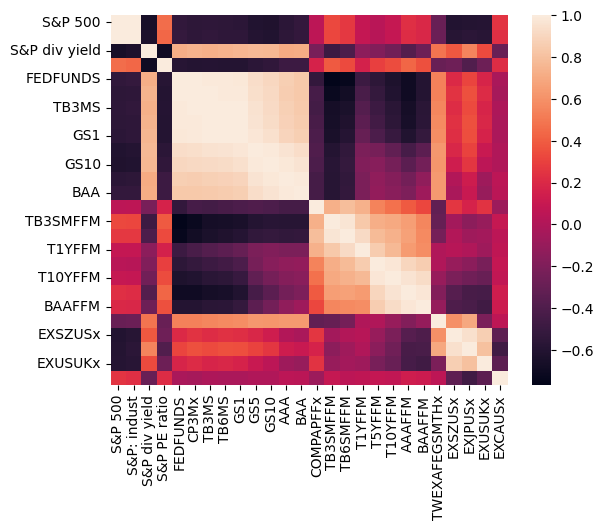

In [88]:
import seaborn as sns
group6and8 = data.iloc[:, list(range(74,100)) ]
sns.heatmap(group6and8.corr())

* This heatmap is more intersting than the previous because we can now see the inverse relationship between S&P 500 and bond yields & treasury rates. This makes sense, bond yields are less risky than the stock market, so they shouldhave an inverse relationship. In other words, when stock market sentiment is positive, investors may be more willing to take on the risk of stocks and seek higher returns, leading to higher stock prices and lower bond prices (which in turn leads to higher bond yields).


Which variables would you correlate as contemporaneous and which variables would you LAG so that you can generate more economically interesting insights? Show the correlation heatmap with this lead/lag and comment on any interesting economic insights?
* BAA and AAA are lagged, currencies are contemporaneous. 

import seaborn as sns
group6and8 = data.iloc[:, list(range(84,87)) ]
sns.heatmap(group6and8.corr())

C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\1456680116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged5['AAA_lag_3'] = lagged5['AAA'].shift(3)
C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\1456680116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged5['AAA_lag_6'] = lagged5['AAA'].shift(6)
C:\Users\mhlad\AppData\Local\Temp\ipykernel_21204\1456680116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

<Axes: >

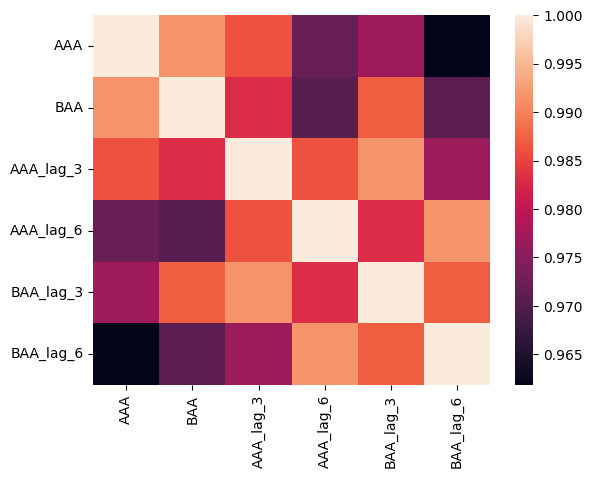

In [150]:
lagged5 = data.iloc[:, list(range(85,87))]
lagged5['AAA_lag_3'] = lagged5['AAA'].shift(3)
lagged5['AAA_lag_6'] = lagged5['AAA'].shift(6)
lagged5['BAA_lag_3'] = lagged5['BAA'].shift(3)
lagged5['BAA_lag_6'] = lagged5['BAA'].shift(6)

sns.heatmap(lagged5.corr())


* These variables are all quite correlated. There is a time delay in these bonds, so we see a higher correlation between the later bonds than the earlier bonds. 

**AI ASSIST** 
1. I did use AI assist for some code generation. 
2. I used chatGPT
3. I used prompts such as: "Selecting multiple columns for a dataframe", "Correlation heat map python", and other simple stuff. 
4. Yes it did help me. It sped up the process of writing the simple code, and kept me from having to spend hours searching the internet for solutions. 